# B-Score Interpolation Analysis

## Data Sources

### Vectors and Latents
- **B-score latents**: `/dataNAS/people/anoopai/DESS_ACL_study/results/BScore_and_FC_metrics/mean_shape_recon/BC_model/shape_change_of_CTRLs_along_Bvector/mean_latent_OAvector_Bscores.npz`
  - Access latents for a B-score (0, 1, 2, ..., 8) as `latent[f'Bscore={bscore}']`

- **Mean healthy control Visit-1 latent**: `/dataNAS/people/anoopai/DESS_ACL_study/results/BScore_and_FC_metrics/mean_shape_recon/BC_model/shape_change_of_CTRLs_along_Bvector/mean_latent_ctrl_Visit-1_Bscore0.16.npz`

- **Analysis code**: `/dataNAS/people/anoopai/KneePipeline/notebooks/shape_change_of_CTRLs_along_Bvector.py`

## Methodology

I have taken the mean healthy control latent from my study (B-score = 1.6) and interpolated in both directions to generate B-scores 0, 1, 2, 3, 4, etc.

**Note**: The SDF and thickness difference maps shown compare mean healthy knee B-score (1.6) to B-score=8 along the OA vector. Similar plots are obtained when comparing B-score=0 to B-score=8.

*The code is currently work in progress and may need refactoring.*

In [1]:
import pymskt as mskt
from NSM.mesh.interpolate import interpolate_points, interpolate_mesh, interpolate_common
from NSM.mesh import create_mesh
from NSM.models import TriplanarDecoder

from itkwidgets import view
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import json

import torch


In [2]:
def load_model(config, path_model_state, model_type='triplanar'):

    if model_type == 'triplanar':
        model_class = TriplanarDecoder
        params = {
            'latent_dim': config['latent_size'],
            'n_objects': config['objects_per_decoder'],
            'conv_hidden_dims': config['conv_hidden_dims'],
            'conv_deep_image_size': config['conv_deep_image_size'],
            'conv_norm': config['conv_norm'], 
            'conv_norm_type': config['conv_norm_type'],
            'conv_start_with_mlp': config['conv_start_with_mlp'],
            'sdf_latent_size': config['sdf_latent_size'],
            'sdf_hidden_dims': config['sdf_hidden_dims'],
            'sdf_weight_norm': config['weight_norm'],
            'sdf_final_activation': config['final_activation'],
            'sdf_activation': config['activation'],
            'sdf_dropout_prob': config['dropout_prob'],
            'sum_sdf_features': config['sum_conv_output_features'],
            'conv_pred_sdf': config['conv_pred_sdf'],
        }
    elif model_type == 'deepsdf':
        model_class = Decoder
        params = {
            'latent_size': config['latent_size'],
            'dims': config['layer_dimensions'],
            'dropout': config['layers_with_dropout'],
            'dropout_prob': config['dropout_prob'],
            'norm_layers': config['layers_with_norm'],
            'latent_in': config['layer_latent_in'],
            'weight_norm': config['weight_norm'],
            'xyz_in_all': config['xyz_in_all'],
            'latent_dropout': config['latent_dropout'],
            'activation': config['activation'],
            'final_activation': config['final_activation'],
            'concat_latent_input': config['concat_latent_input'],
            'n_objects': config['objects_per_decoder'],
            'progressive_add_depth': config['progressive_add_depth'],
            'layer_split': config['layer_split'],
        }
    else:
        raise ValueError(f'Unknown model type: {model_type}')


    model = model_class(**params)
    saved_model_state = torch.load(path_model_state)
    model.load_state_dict(saved_model_state["model"])
    model = model.cuda()
    model.eval()
    return model


# Gather all the latent vectors
dir_path= '/dataNAS/people/anoopai/DESS_ACL_study'
data_path= os.path.join(dir_path, 'data')
log_path = '/dataNAS/people/anoopai/KneePipeline/logs'
output_file = os.path.join(log_path, f'create_mean_shape_of_CTRLs_along_Bvector.txt')
path_config= '/dataNAS/people/anoopai/KneePipeline/config.json'

with open(path_config) as f:
    config = json.load(f)
    
    
path_model_config = config['nsm']['path_model_config']
path_model_state = config['nsm']['path_model_state']

# Get BScore model path information
path_model_folder = config['bscore']['path_model_folder'] 

n_objects = 2

with open(path_model_config, 'r') as f:
    model_config = json.load(f)

model = load_model(model_config, path_model_state, model_type='triplanar', )

In [3]:
path_latent_vectors = '/dataNAS/people/anoopai/DESS_ACL_study/results/BScore_and_FC_metrics/mean_shape_recon/BC_model/shape_change_of_CTRLs_along_Bvector/mean_latent_OAvector_Bscores.npz'
latent_vectors = np.load(path_latent_vectors)

model = model.cuda()

bscore_0 = torch.Tensor(latent_vectors['Bscore=0.0']).to('cuda')
bscore_8 = torch.Tensor(latent_vectors['Bscore=8.0']).to('cuda')

print('creating mesh for bscore 0')
mesh1 = create_mesh(model, bscore_0, n_pts_per_axis=256, objects=2)
print('creating mesh for bscore 8')
mesh2 = create_mesh(model, bscore_8, n_pts_per_axis=256, objects=2)

creating mesh for bscore 0
Processed 32768 / 16777216 points
Processed 65536 / 16777216 points
Processed 98304 / 16777216 points
Processed 131072 / 16777216 points
Processed 163840 / 16777216 points
Processed 196608 / 16777216 points
Processed 229376 / 16777216 points
Processed 262144 / 16777216 points
Processed 294912 / 16777216 points
Processed 327680 / 16777216 points
Processed 360448 / 16777216 points
Processed 393216 / 16777216 points
Processed 425984 / 16777216 points
Processed 458752 / 16777216 points
Processed 491520 / 16777216 points
Processed 524288 / 16777216 points
Processed 557056 / 16777216 points
Processed 589824 / 16777216 points
Processed 622592 / 16777216 points
Processed 655360 / 16777216 points
Processed 688128 / 16777216 points
Processed 720896 / 16777216 points
Processed 753664 / 16777216 points
Processed 786432 / 16777216 points
Processed 819200 / 16777216 points
Processed 851968 / 16777216 points
Processed 884736 / 16777216 points
Processed 917504 / 16777216 poi

In [4]:
mesh_1_bone, mesh_1_cartilage = mesh1
mesh_2_bone, mesh_2_cartilage = mesh2

In [5]:
view(geometries=[mesh_1_bone, mesh_2_bone])

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [6]:
mesh1_bone = mskt.mesh.BoneMesh(mesh_1_bone, list_cartilage_meshes=[mesh_1_cartilage])
mesh2_bone = mskt.mesh.BoneMesh(mesh_2_bone, list_cartilage_meshes=[mesh_2_cartilage])

mesh1_bone.calc_cartilage_thickness(ray_cast_length=10/45, percent_ray_length_opposite_direction=0.05)
mesh2_bone.calc_cartilage_thickness(ray_cast_length=10/45, percent_ray_length_opposite_direction=0.05)


INTERSECTION IS:  2
INTERSECTION IS:  2


In [7]:
view(geometries=[mesh1_bone, mesh2_bone])

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [8]:
mesh1_bone.list_cartilage_meshes = [mskt.mesh.CartilageMesh(mesh_1_cartilage)]
mesh1_bone.resample_surface(clusters=20_000)

In [9]:
mesh1_bone.calc_cartilage_thickness(ray_cast_length=10/45, percent_ray_length_opposite_direction=0.05)

INTERSECTION IS:  2


In [10]:
view(geometries=[mesh1_bone])

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [11]:
mesh_points_interp_femur= interpolate_points(
    model=model,
    latent1= bscore_0,
    latent2= bscore_8,
    n_steps= 100,
    points1= mesh1_bone.point_coords,
    surface_idx= 0,
    verbose= False,
    spherical= False
)

In [12]:
interpolated_bscore_0 = mesh1_bone.copy()
interpolated_bscore_0.point_coords = mesh_points_interp_femur

In [13]:
view(geometries=[interpolated_bscore_0, mesh2_bone])

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [14]:
interpolated_bscore_0.copy_scalars_from_other_mesh_to_current(mesh2_bone)

{'thickness (mm)': array([0., 0., 0., ..., 0., 0., 0.])}

In [15]:
baseline_thickness = mesh1_bone['thickness (mm)']
bscore_8_thickness = interpolated_bscore_0['thickness (mm)']

(array([1.3495e+04, 2.9500e+02, 8.6500e+02, 1.4280e+03, 1.9730e+03,
        1.5260e+03, 3.9500e+02, 1.1000e+01, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.        , 0.00944245, 0.01888491, 0.02832736, 0.03776982,
        0.04721227, 0.05665473, 0.06609718, 0.07553964, 0.08498209,
        0.09442455, 0.103867  , 0.11330946, 0.12275191, 0.13219437,
        0.14163682, 0.15107928, 0.16052173, 0.16996419, 0.17940664,
        0.1888491 ]),
 <BarContainer object of 20 artists>)

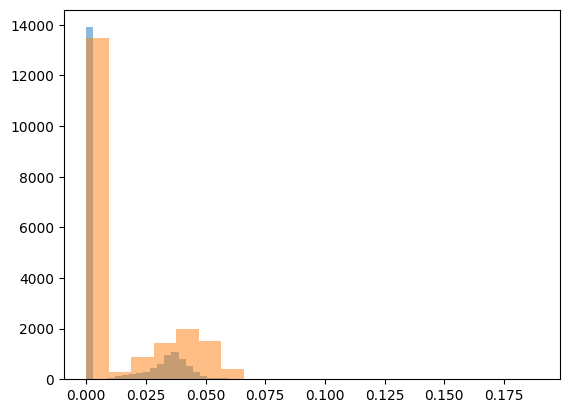

In [16]:
plt.hist(baseline_thickness, bins=20, alpha=0.5, label='Baseline')
plt.hist(bscore_8_thickness, bins=20, alpha=0.5, label='B-score 8')

In [17]:
diff = bscore_8_thickness - baseline_thickness
diff = diff * 45
mesh1_bone['thickness_change'] = diff

In [18]:
view(geometries=[mesh1_bone])

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…